# Create 2D Channel Surface Using Python

I would like to create a simple 100ft long, 20ft wide rectange 2D channel in XPSWMM.
- generate a 1ft grid
- assign z values to each node
- a 2ft drop over 100 ft
- a 5ft "bank" of the channel

The code below generate the *.xyz file for XPSWMM to import.

In [11]:
import pandas as pd
import os


def create_xyz(side_level=5, channel_width=20, channel_drop=2, channel_length=100, side_width=5):
    # list to hold x, y, z coordinates
    xs = []
    ys = []
    zs = []

    # create the table with x, y, z for each row for all the grid
    for x in range(-side_width, side_width + channel_width + 1):
        for y in range(0, channel_length + 1):
            xs.append(x)
            ys.append(y)
            zs.append(0)

    df = pd.DataFrame({'x': xs, 'y': ys, 'z':zs})

    # set the two sides 

    df.loc[df['x']<0, 'z'] = side_level
    df.loc[df['x']>channel_width, 'z'] = side_level

    for x in range(0, channel_width + 1):
        for y in range(0, channel_length + 1):
            z = y*channel_drop/channel_length
            df.loc[(df['x']==x) & (df['y']==y), 'z'] = z
    return df
ws = r'C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\1d2d\data'
df = create_xyz(side_level=5, channel_width=20, channel_drop=0.5, channel_length=100, side_width=5)
df.to_csv(os.path.join(ws, 'channel.xyz'), index=False)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

A better way is to use the **%matplotlib widget** magic command, then I can rotate and zoom the 3D viewer as shown below.

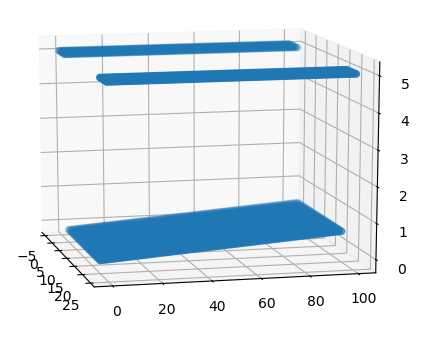

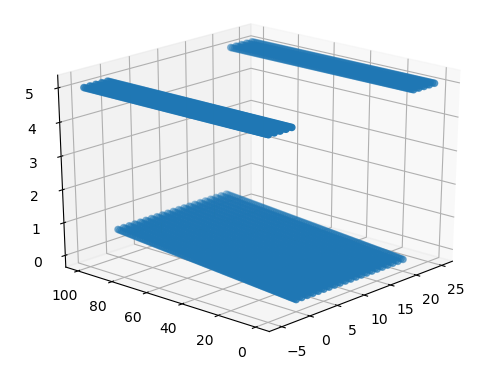

Then I can import the xyz file into XPSWMM, all I need is to remove the header line of the \*.csv file created 

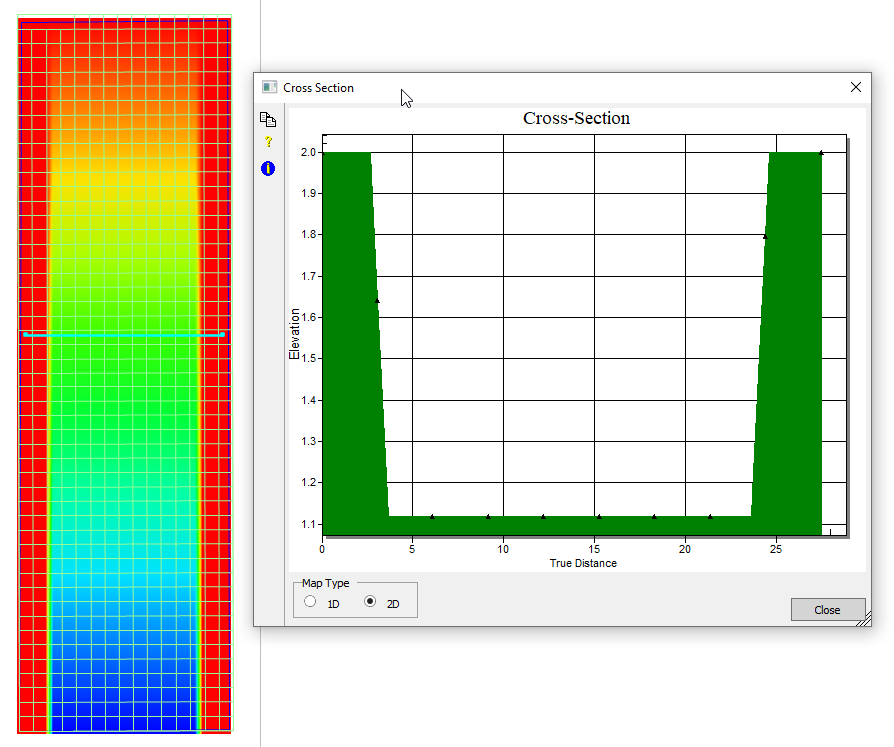